In [2]:
%load_ext autoreload

%autoreload 2

from tqdm.notebook import trange, tqdm
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
import cProfile

from model import model
from model import variables
from model import snr_to_ber

In [29]:
#cProfile.run('model.run_model(velocity=20, q_bit=0, tid_is_on=False, tari=6.25, num_of_sym_per_bit=1, trext=0)')

In [7]:
res_tari_625_m_1_tid_off = [model.run_model(velocity=v, q_bit=2, tid_is_on=False,
              tari=6.25, num_of_sym_per_bit=1, trext=0) for v in tqdm(range(13, 40, 3))]

  0%|          | 0/9 [00:00<?, ?it/s]

In [3]:
res_tari_125_m1_tid_on = [model.run_model(velocity=v, q_bit=2, tid_is_on=False,
              tari=12.5, num_of_sym_per_bit=1, trext=1) for v in tqdm(range(13, 40, 3))] 

  0%|          | 0/9 [00:00<?, ?it/s]

In [16]:
model.run_model(velocity=18, q_bit=2, tid_is_on=True,
              tari=6.25, num_of_sym_per_bit=1, trext=0)

ProbRet(velocity=18, probability=0.001, num_cars=1.0, num_rounds=193.33833333333334, round_duration=0.0030611916462408508)

In [22]:
model.run_model(velocity=33, q_bit=2, tid_is_on=True,
              tari=25, num_of_sym_per_bit=4, trext=0)

ProbRet(velocity=33, probability=0.7290000000000001, num_cars=1.0, num_rounds=14.394666666666666, round_duration=0.012162090416903667)

In [6]:
res_tari_125_m1_tid_on

[ProbRet(velocity=13, probability=0.9996666666666667, num_cars=1.0, num_rounds=496.9153333333333, round_duration=0.0017861662200205934),
 ProbRet(velocity=16, probability=0.9983333333333334, num_cars=1.0, num_rounds=402.7596666666667, round_duration=0.0016450626209757531),
 ProbRet(velocity=19, probability=0.996, num_cars=1.0, num_rounds=339.41733333333343, round_duration=0.0015611107608195065),
 ProbRet(velocity=22, probability=0.9913333333333334, num_cars=1.0, num_rounds=292.01599999999996, round_duration=0.0015033793150664107),
 ProbRet(velocity=25, probability=0.9883333333333334, num_cars=1.0, num_rounds=256.6486666666667, round_duration=0.0014628607158369412),
 ProbRet(velocity=28, probability=0.9820000000000002, num_cars=1.0, num_rounds=229.07966666666667, round_duration=0.001432682206406963),
 ProbRet(velocity=31, probability=0.9770000000000002, num_cars=1.0, num_rounds=206.94400000000002, round_duration=0.0014089672799401547),
 ProbRet(velocity=34, probability=0.965333333333333

In [8]:
res_tari_625_m_1_tid_off

[ProbRet(velocity=13, probability=0.6900000000000002, num_cars=1.0, num_rounds=992.8366666666667, round_duration=0.0008976619332232939),
 ProbRet(velocity=16, probability=0.629, num_cars=1.0, num_rounds=805.3333333333335, round_duration=0.0008346612319281468),
 ProbRet(velocity=19, probability=0.5706666666666667, num_cars=1.0, num_rounds=677.5016666666668, round_duration=0.0007961322770204543),
 ProbRet(velocity=22, probability=0.49733333333333335, num_cars=1.0, num_rounds=583.0923333333334, round_duration=0.0007695738458368233),
 ProbRet(velocity=25, probability=0.46033333333333326, num_cars=1.0, num_rounds=512.7026666666667, round_duration=0.0007508857037319191),
 ProbRet(velocity=28, probability=0.4416666666666666, num_cars=1.0, num_rounds=457.88366666666667, round_duration=0.0007368732756420553),
 ProbRet(velocity=31, probability=0.3859999999999999, num_cars=1.0, num_rounds=413.3843333333334, round_duration=0.0007256304659539409),
 ProbRet(velocity=34, probability=0.366999999999999

In [4]:
res_tari_625_m_1_tid_off

[ProbRet(velocity=13, probability=0.8546666666666667, num_cars=1.0, num_rounds=1648.2229999999997, round_duration=0.0005217088881590349),
 ProbRet(velocity=15, probability=0.8173333333333334, num_cars=1.0, num_rounds=1428.5819999999997, round_duration=0.0004697098949301303),
 ProbRet(velocity=17, probability=0.7743333333333333, num_cars=1.0, num_rounds=1260.5086666666664, round_duration=0.0004362397100273646),
 ProbRet(velocity=19, probability=0.7469999999999999, num_cars=1.0, num_rounds=1127.8239999999998, round_duration=0.00041288326348392853),
 ProbRet(velocity=21, probability=0.696, num_cars=1.0, num_rounds=1020.3829999999998, round_duration=0.0003956661574910459),
 ProbRet(velocity=23, probability=0.677666666666667, num_cars=1.0, num_rounds=931.7170000000002, round_duration=0.0003824182999296214),
 ProbRet(velocity=25, probability=0.635, num_cars=1.0, num_rounds=857.1433333333334, round_duration=0.0003719406297728263),
 ProbRet(velocity=27, probability=0.6053333333333333, num_cars

In [5]:
res_tari_625_m_1_tid_off

[ProbRet(velocity=13, probability=0.8866666666666666, num_cars=1.0, num_rounds=1648.58, round_duration=0.0005323526762524004),
 ProbRet(velocity=15, probability=0.8133333333333335, num_cars=1.0, num_rounds=1428.8466666666666, round_duration=0.0004907305864938624),
 ProbRet(velocity=17, probability=0.7866666666666666, num_cars=1.0, num_rounds=1260.4333333333334, round_duration=0.00046104196754737016),
 ProbRet(velocity=19, probability=0.7733333333333333, num_cars=1.0, num_rounds=1127.7733333333333, round_duration=0.0004386855670589927),
 ProbRet(velocity=21, probability=0.7333333333333333, num_cars=1.0, num_rounds=1020.5333333333333, round_duration=0.0004212562338549211),
 ProbRet(velocity=23, probability=0.7133333333333333, num_cars=1.0, num_rounds=931.4666666666667, round_duration=0.00040736324181569485),
 ProbRet(velocity=25, probability=0.6666666666666667, num_cars=1.0, num_rounds=856.9066666666666, round_duration=0.0003959698320101076),
 ProbRet(velocity=27, probability=0.613333333

In [13]:
res_tari_625_m_1_tid_off

[ProbRet(velocity=13, probability=0.85, num_cars=1.0, num_rounds=1648.4099999999999, round_duration=0.000532428364483554),
 ProbRet(velocity=15, probability=0.8533333333333333, num_cars=1.0, num_rounds=1428.7066666666667, round_duration=0.0004907653740458393),
 ProbRet(velocity=17, probability=0.8066666666666668, num_cars=1.0, num_rounds=1260.6899999999998, round_duration=0.00046097184895353943),
 ProbRet(velocity=19, probability=0.75, num_cars=1.0, num_rounds=1128.03, round_duration=0.00043861723428735284),
 ProbRet(velocity=21, probability=0.6533333333333333, num_cars=1.0, num_rounds=1020.71, round_duration=0.00042121013251518056),
 ProbRet(velocity=23, probability=0.6366666666666667, num_cars=1.0, num_rounds=931.5633333333334, round_duration=0.000407367102131572),
 ProbRet(velocity=25, probability=0.6166666666666667, num_cars=1.0, num_rounds=857.1733333333333, round_duration=0.00039593173586565105),
 ProbRet(velocity=27, probability=0.5733333333333333, num_cars=1.0, num_rounds=794.0

In [14]:
res_tari_625_m_1_tid_off

[ProbRet(velocity=13, probability=0.8566666666666667, num_cars=1.0, num_rounds=1648.6599999999999, round_duration=0.0005323416226200118),
 ProbRet(velocity=15, probability=0.8266666666666665, num_cars=1.0, num_rounds=1428.6033333333332, round_duration=0.0004907852509200365),
 ProbRet(velocity=17, probability=0.7866666666666667, num_cars=1.0, num_rounds=1260.4666666666665, round_duration=0.00046102912905962346),
 ProbRet(velocity=19, probability=0.7566666666666667, num_cars=1.0, num_rounds=1128.0200000000002, round_duration=0.00043863036046489835),
 ProbRet(velocity=21, probability=0.7133333333333334, num_cars=1.0, num_rounds=1020.6433333333333, round_duration=0.0004212330045339736),
 ProbRet(velocity=23, probability=0.6433333333333333, num_cars=1.0, num_rounds=932.0600000000001, round_duration=0.00040726944308255885),
 ProbRet(velocity=25, probability=0.6666666666666667, num_cars=1.0, num_rounds=857.4333333333333, round_duration=0.00039587738635363175),
 ProbRet(velocity=27, probabilit

In [5]:
df_tari_625_m1_tid_off = pd.DataFrame(data=res_tari_625_m_1_tid_off)

In [19]:
df_tari_625_m1_tid_off.to_csv('data/tari_625_m1_tid_off.csv')

<AxesSubplot:xlabel='velocity'>

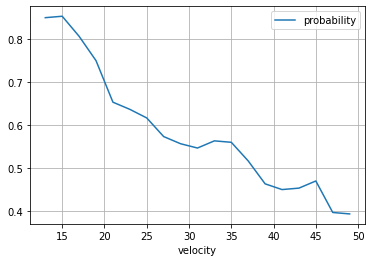

In [16]:
df_tari_625_m1_tid_off.plot(x='velocity', y='probability', grid=True)

<AxesSubplot:xlabel='velocity'>

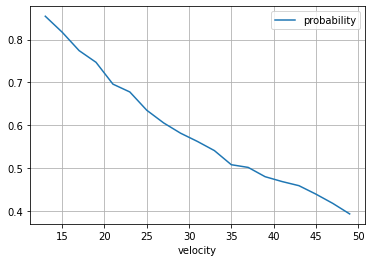

In [6]:
df_tari_625_m1_tid_off.plot(x='velocity', y='probability', grid=True)